# **Wood classification - predicting images**

In this Notebook, an already trained neural network capable of distinguishing images of clearwood from images of wood containing defects * (stains, dead knots, live knots, pitch pockets and splits) * is presented.

This binary classifier has an accuracy rate of around 94% and was trained on a database of 400 images containing more than 200 wood species. Although the database is limited in size, the neural network is able to generalize to other databases satisfactorily. This good generalization is due to:


1. The great variety of species of the database.
2. The artificial augmentation operated during the learning process.
3. The artificial augmentation operated during the prediction.

*PS: Please note that for a notebook script to work, the previous scripts must have been run.*


**Part 0 - Google Drive Access** 

In this part we define the access to your Drive where the codes, the model and the images are stored.


*NB-1: As stated in the README if this is your first time running this notebook, please create a "Project_google_colab" folder in your google drive.*

*NB-2: You will simply have to launch the two lines of code below, click on the generated link in order to authorize access to your google drive. Copy the generated key on the link and enter it below.*


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


***First run:*** The GitHub folder containing the codes, models and image directories is copied to your google drive with the following path: Goodle Drive -> Project_google_colab -> Classification-Bois.

In [3]:
%cd /content/drive/My Drive/Project_google_colab
! git clone https://github.com/ArthurCalvi/Classifieur-Bois

/content/drive/My Drive/Project_google_colab
fatal: destination path 'Classifieur-Bois' already exists and is not an empty directory.


***Other executions***: If you want to update the GitHub folder:

In [18]:
%cd /content/drive/My Drive/Project_google_colab/Classifieur-Bois
! git pull

/content/drive/My Drive/Project_google_colab/Classifieur-Bois
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 10 (delta 2), reused 10 (delta 2), pack-reused 0
Unpacking objects: 100% (10/10), done.
From https://github.com/ArthurCalvi/Classifieur-Bois
   6fd0745..b1452b9  master     -> origin/master
Updating 6fd0745..b1452b9
Fast-forward
 New_Dataset/clearwood/clearwood_256_221.jpg | Bin 0 -> 8015 bytes
 New_Dataset/defect/defects_256_207.jpg      | Bin 0 -> 11681 bytes
 2 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 New_Dataset/clearwood/clearwood_256_221.jpg
 create mode 100644 New_Dataset/defect/defects_256_207.jpg


**Part 1 - Imports**

The API https://keras.io/ was chosen to create the neural network. Although it is not the most used API now (It is: https://pytorch.org/), it is the oldest API on the market: the literature is not lacking about it !

In [5]:

import random as rd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Import of os and sys libraries to manipulate files
import os, sys

#Imports of github personal files
from custom_functions_v1 import crop_generator, random_crop, colorize_v2

# Keras API
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.models import load_model


**Part 2 - Loading the model**

The model has been trained before: the architecture, the hyperparameters and the parameters have been saved.

In [6]:
model = load_model('/content/drive/My Drive/Project_google_colab/Classifieur-Bois/MODEL_CNN1_bs32_ep100_augTrue_t1593511641.h5')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_7 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 32)       

**Part 3 - Prediction function**

In this part the prediction function is defined. This function predicts the membership class of an image from several versions of this image created by random artificial augmentation. The randomness of the prediction means that the probability that an image is a certain class can vary slightly by making several attempts.




In [14]:

def prediction(img,nbr_images):
    """ 
    Perform the prediction of the image [img] from [nbr_images] augmented
    images.
    
    INPUT :
        -img : array loaded with load_img 
        -nbr_images : integer representing the number of augmented images used
         for prediction 
        
        
    OUTPUT :
        -prediction : final prediction averaged over several images
        -probability : final probability avergared over several images
    """
    
    # convert to numpy array
    data = img_to_array(img)
    # expand dimension to one sample
    samples = np.expand_dims(data, 0)
    
    # create data for the test
    datagen = ImageDataGenerator( fill_mode='reflect', 
                                  samplewise_center=True,
                                  samplewise_std_normalization=True,
                                  horizontal_flip=True, vertical_flip=True, 
                                  rotation_range=10, brightness_range= [0.6,1.4], 
                                  preprocessing_function = colorize_v2, 
                                  zoom_range = [1.0,1.3])
    
    batch = datagen.flow(samples, batch_size=1)
    
    #add random cropped
    prediction = []
    
    for i in range(nbr_images):
        
        img = batch.next()
        img = random_crop(img[0].astype('float32'), (224,224))
        img = np.expand_dims(img, 0)
        prediction.append(model.predict(img))
        
    prediction = sum(prediction)/nbr_images
    prediction = np.array(prediction).tolist()[0][0]
    
    return prediction  



**Part 4 - Your turn to play!**

In this part you can predict the class of an image that you have stored in the drive by respecting the protocol described here: https://colab.research.google.com/drive/13-HSbLVSKjOFNxfxGnTD0467jFf4Dhcv?usp=sharing. 

You must fill in:
1. name_img: the name of the image to predict which is located in the IMAGES_preprocessed *folder (don't forget the .jpg extension)*.
2. nbr_images: the number of augmented images created to predict the image class. ex: nbr_images = 10.
3. save : True if you want to save the image into the New_Dataset folder, according the predicted class of the image, it will be automatically saved into the defect or the clearwood folder. 



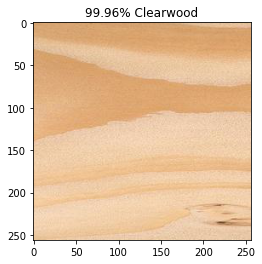

In [19]:
name_img = 'clearwood_256_221.jpg'
nbr_images = 10
saved = True 

path = '/content/drive/My Drive/Project_google_colab/Classifieur-Bois/IMAGES_preprocessed/'
img = load_img(path+name_img)
score = prediction(img, nbr_images)
img_v = mpimg.imread(path+name_img)

#revoir proba
if score>0.5:
    plt.imshow(img_v)
    plt.title('{0:.2%} Defect'.format(score))
    if saved:
        img.save('/content/drive/My Drive/Project_google_colab/Classifieur-Bois/New_Dataset/defect/'+name_img)
else : 
    plt.imshow(img_v)
    plt.title('{0:.2%} Clearwood'.format(1-score))
    if saved:
        img.save('/content/drive/My Drive/Project_google_colab/Classifieur-Bois/New_Dataset/clearwood/'+name_img)

